In [1]:
import numpy as np
import matplotlib.pyplot as plt
from emit_tools import *

In [2]:
filename = expanduser(join("~", "Downloads", "EMIT_L2A_RFL_001_20240521T232728_2414216_003.nc"))

In [3]:
swath_ds = emit_xarray(filename, ortho=False)
swath_ds.reflectance.data = np.where(swath_ds.reflectance.data == -9999, np.nan, swath_ds.reflectance.data)
swath_ds

<xarray.Dataset> Size: 2GB
Dimensions:           (downtrack: 1280, crosstrack: 1242, wavelengths: 285,
                       ortho_y: 1893, ortho_x: 2327)
Coordinates:
  * downtrack         (downtrack) int64 10kB 0 1 2 3 4 ... 1276 1277 1278 1279
  * crosstrack        (crosstrack) int64 10kB 0 1 2 3 4 ... 1238 1239 1240 1241
    lon               (downtrack, crosstrack) float64 13MB ...
    lat               (downtrack, crosstrack) float64 13MB ...
    elev              (downtrack, crosstrack) float64 13MB ...
    glt_x             (ortho_y, ortho_x) float64 35MB ...
    glt_y             (ortho_y, ortho_x) float64 35MB ...
  * wavelengths       (wavelengths) float32 1kB 381.0 388.4 ... 2.493e+03
    fwhm              (wavelengths) float32 1kB ...
    good_wavelengths  (wavelengths) float32 1kB ...
Dimensions without coordinates: ortho_y, ortho_x
Data variables:
    reflectance       (downtrack, crosstrack, wavelengths) float32 2GB 0.0431...
Attributes: (12/39)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    spatialResolution:                 0.000542232520256367
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.16103646e+02  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...
    granule_id:                        EMIT_L2A_RFL_001_20240521T232728_24142...

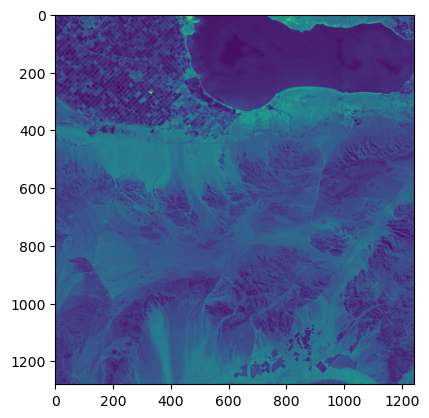

In [4]:
plt.imshow(swath_ds.reflectance[:,:,20])

In [5]:
ds = emit_xarray(filename, ortho=True)
ds.reflectance.data = np.where(ds.reflectance.data == -9999, np.nan, ds.reflectance.data)
ds

<xarray.Dataset> Size: 5GB
Dimensions:           (latitude: 1893, longitude: 2327, wavelengths: 285)
Coordinates:
  * wavelengths       (wavelengths) float32 1kB 381.0 388.4 ... 2.493e+03
    fwhm              (wavelengths) float32 1kB ...
    good_wavelengths  (wavelengths) float32 1kB ...
  * latitude          (latitude) float64 15kB 33.95 33.95 33.95 ... 32.93 32.93
  * longitude         (longitude) float64 19kB -116.1 -116.1 ... -114.8 -114.8
    elev              (latitude, longitude) float32 18MB -9.999e+03 ... -9.99...
    spatial_ref       int64 8B 0
Data variables:
    reflectance       (latitude, longitude, wavelengths) float32 5GB nan ... nan
Attributes: (12/40)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.16103646e+02  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...
    granule_id:                        EMIT_L2A_RFL_001_20240521T232728_24142...
    Orthorectified:                    True

In [6]:
ds.reflectance.shape

(1893, 2327, 285)

In [7]:
np.nanmin(ds.reflectance), np.nanmax(ds.reflectance)

(np.float32(-0.075476676), np.float32(0.6814399))

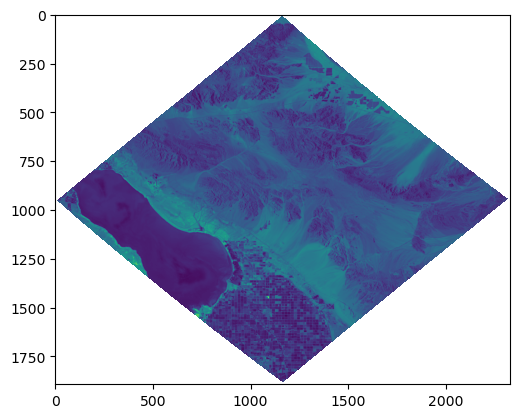

In [8]:
plt.imshow(ds.reflectance[:,:,20])